In [41]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
data = pd.read_csv('bestsellers with categories.csv')
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [43]:
data.tail(3)

,Name,Author,User Rating,Reviews,Price,Year,Genre
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [44]:
# Look for missing values
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [45]:
# Look for any missing values
data.duplicated().sum()

0

In [46]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


### Analysis & Visualisation 

In [48]:
print('There\'s {} fiction books in our dataset.'.format(sum(data[data['Genre'] == 'Fiction'].value_counts())))
print('There\'s {} non-fiction books in our dataset.'.format(sum(data[data['Genre'] == 'Non Fiction'].value_counts())))

There's 240 fiction books in our dataset.
There's 310 non-fiction books in our dataset.


In [49]:
# Book with the highest Reviews 
data[data['Reviews'].max() == data['Reviews']]['Name']

534    Where the Crawdads Sing
Name: Name, dtype: object

In [50]:
# Top 10 books with the highest reviews 
top_ten = data.sort_values(by='Reviews', ascending=False).head(10)
top_ten

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction


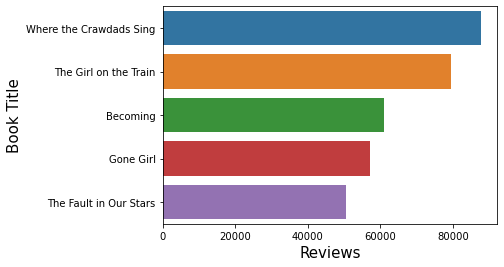

In [51]:
sns.barplot(x='Reviews', y ='Name', data=top_ten)
plt.xlabel('Reviews', fontsize=15)
plt.ylabel('Book Title', fontsize=15)
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Reviews'>

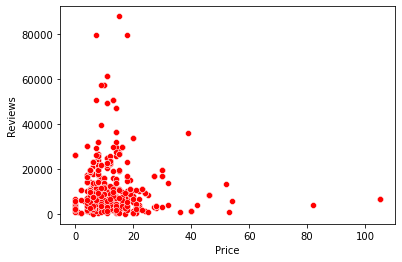

In [52]:
# Does the number of reviews affect the price
sns.scatterplot(x='Price', y='Reviews', data=data, color='r')

In [53]:
# Display Category-Wise Count of book Genre [Year Wise] 
data.groupby('Year')['Genre'].value_counts()

Year  Genre      
2009  Non Fiction    26
      Fiction        24
2010  Non Fiction    30
      Fiction        20
2011  Non Fiction    29
      Fiction        21
2012  Non Fiction    29
      Fiction        21
2013  Non Fiction    26
      Fiction        24
2014  Fiction        29
      Non Fiction    21
2015  Non Fiction    33
      Fiction        17
2016  Non Fiction    31
      Fiction        19
2017  Non Fiction    26
      Fiction        24
2018  Non Fiction    29
      Fiction        21
2019  Non Fiction    30
      Fiction        20
Name: Genre, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

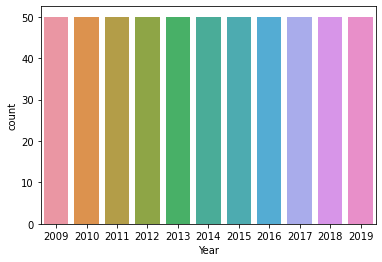

In [54]:
# Display Number of book Per Year
sns.countplot('Year', data=data)